In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data(size_column, y_column):
    """
    Plot the Size data of Table 1 and the C data of Table 2, with the X-axis being Age/Time (0-5 Ma).

    Parameters:
    size_column: str - the y-axis column of Table 1 (Size data)
    C_column: str - the y-axis column of Table 2 (C data)
    """
    # Fix file path
    file1_path = "cleaned_mastersheet.xlsx"
 
    # Read Excel file
    df = pd.read_excel(file1_path, header=1)
  
    # Make sure the column name is correct
    age_column = "Age (Ma)"  # The x-axis column of Table 1
   
    
    # Handle NaN data (interpolation filling)
    df[[size_column, y_column]] = df[[size_column, y_column]].interpolate(method="linear", limit_direction="both")
  
    # Handle NaN data (interpolation filling)
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Draw left Y-axis data
    ax1.set_xlabel(AGE_COLUMN)
    ax1.set_ylabel(size_column, color="tab:blue")
    ax1.plot(df[AGE_COLUMN], df[size_column], label=size_column, color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Create second Y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_column, color="tab:red")
    ax2.plot(df[AGE_COLUMN], df[y_column], label=y_column, color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title & layout adjustment 
    plt.title(f"{size_column} vs. {y_column} with {age_column} as X-axis (0-5 Range)")
    fig.tight_layout()
    plt.show()

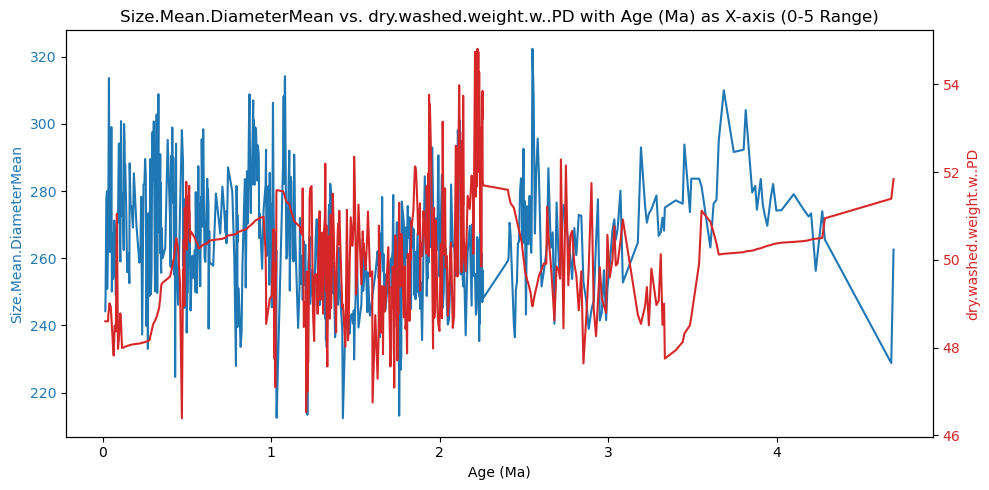

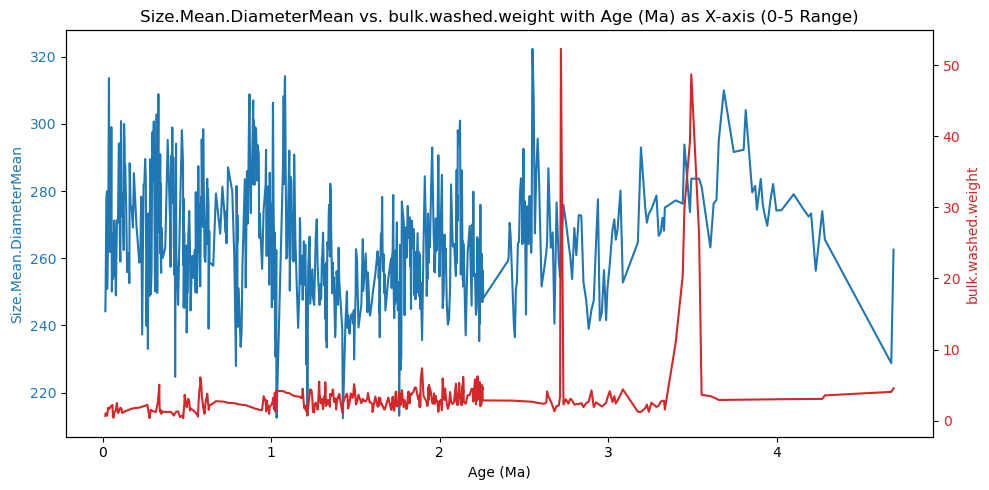

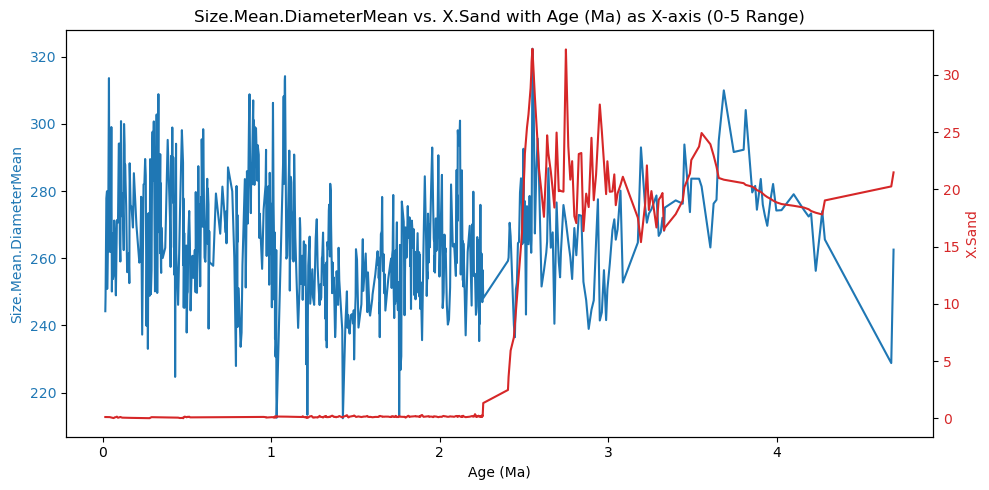

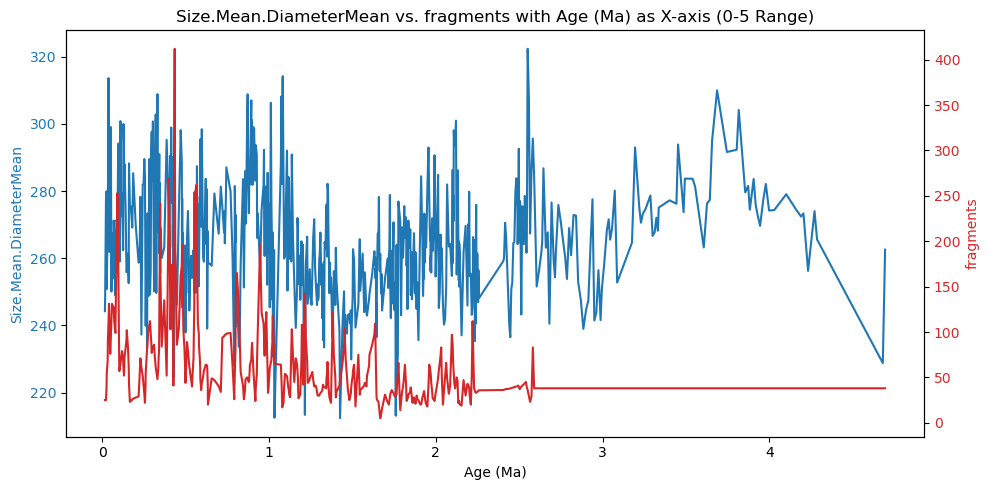

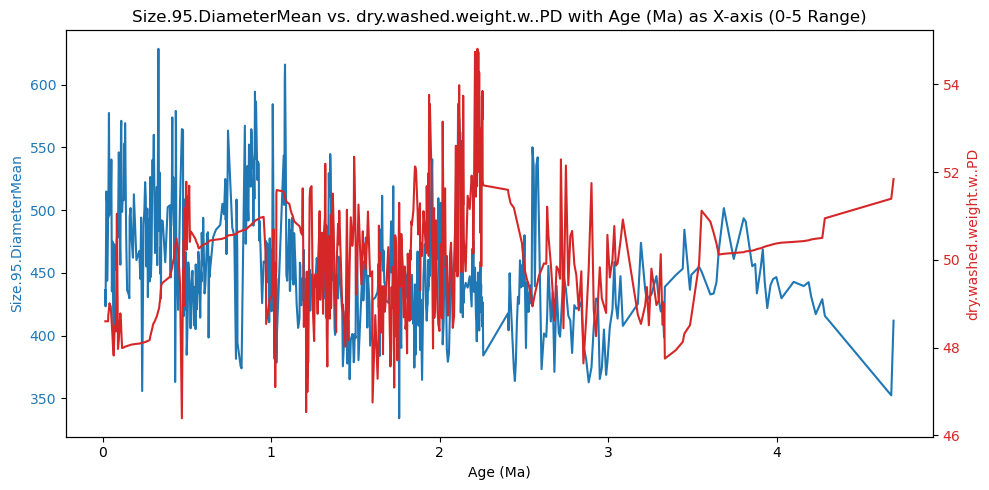

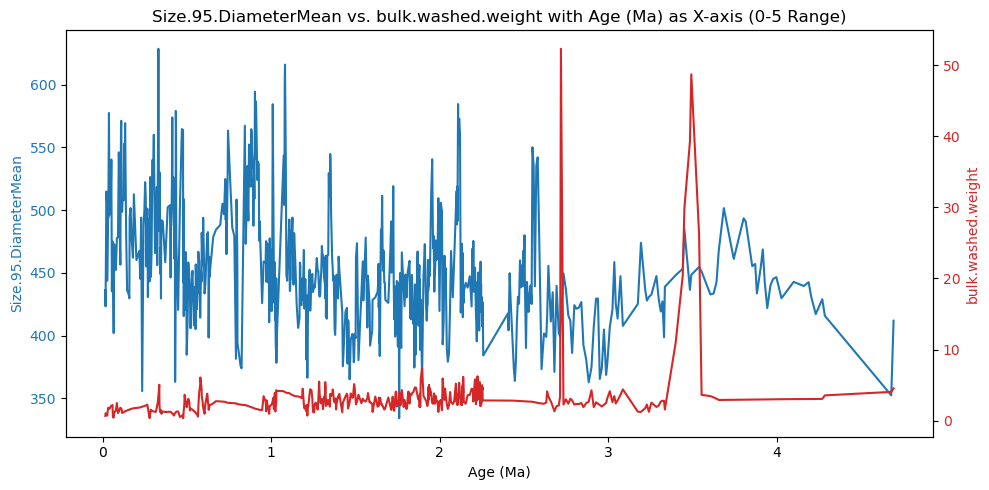

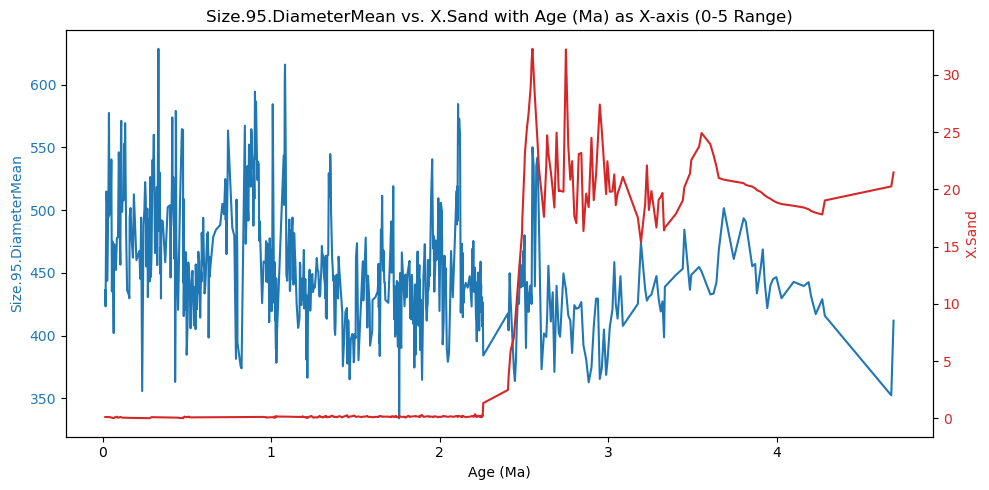

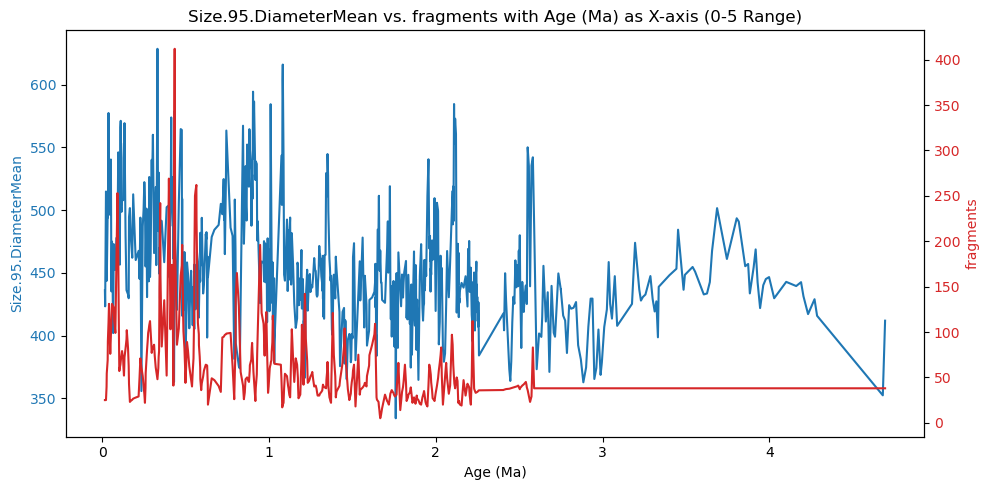

In [23]:
plot_data("Size.Mean.DiameterMean", "dry.washed.weight.w..PD")
plot_data("Size.Mean.DiameterMean", "bulk.washed.weight")
plot_data("Size.Mean.DiameterMean", "X.Sand")
plot_data("Size.Mean.DiameterMean", "fragments")
plot_data("Size.95.DiameterMean", "dry.washed.weight.w..PD")
plot_data("Size.95.DiameterMean", "bulk.washed.weight")
plot_data("Size.95.DiameterMean", "X.Sand")
plot_data("Size.95.DiameterMean", "fragments")


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file1_path = "cleaned_mastersheet.xlsx"
age_column = "Age (Ma)" 
fragments_column = "fragments"
def load_and_process_data(size_column, y_column):

 # Read Excel file
    df = pd.read_excel(file1_path, header=1)
    
    # Filter data with Age between 0-3
    df_filtered = df[(df[age_column] >= 0) & (df[age_column] <= 3)].copy()
    
    # Handle NaN data (interpolation filling)
    df_filtered[[size_column, y_column]] = df_filtered[[size_column, y_column]].interpolate(method="linear", limit_direction="both")
    
    # Calculate IQR and remove outliers
    Q1 = df_filtered[fragments_column].quantile(0.25)  # 25th percentile
    Q3 = df_filtered[fragments_column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df_filtered[(df_filtered[fragments_column] >= lower_bound) & (df_filtered[fragments_column] <= upper_bound)]
    
    return df_filtered

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data1(size_column, y_column):
    # Call the function to load and process data
    df_filtered = load_and_process_data(size_column, y_column)

    # Create canvas and dual Y-axis
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Draw the left Y-axis data
    ax1.set_xlabel(age_column)
    ax1.set_ylabel(size_column, color="tab:blue")
    ax1.plot(df_filtered[age_column], df_filtered[size_column], label=size_column, color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Create the second Y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_column, color="tab:red")
    ax2.plot(df_filtered[age_column], df_filtered[y_column], label=y_column, color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title & layout adjustment 
    plt.title(f"{size_column} vs. {y_column} with {age_column} as X-axis (0-3 Range)")
    fig.tight_layout()
    plt.show()

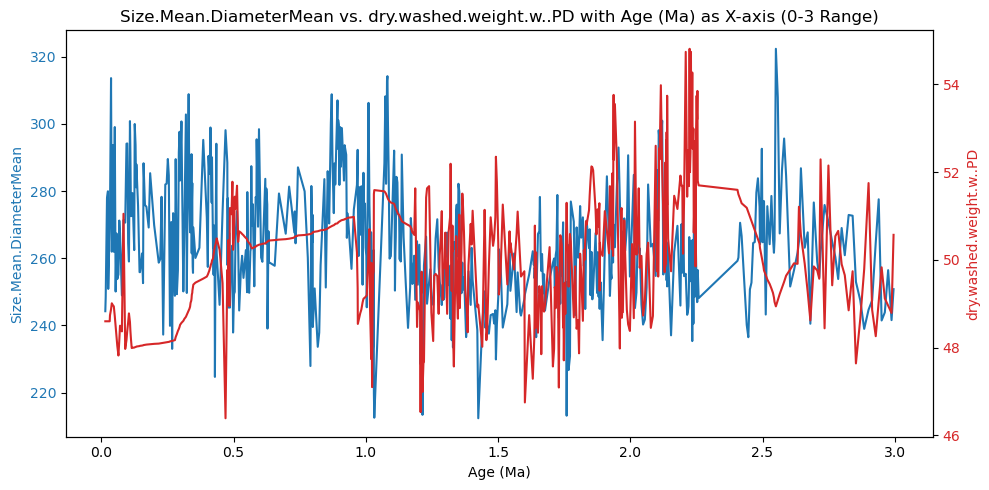

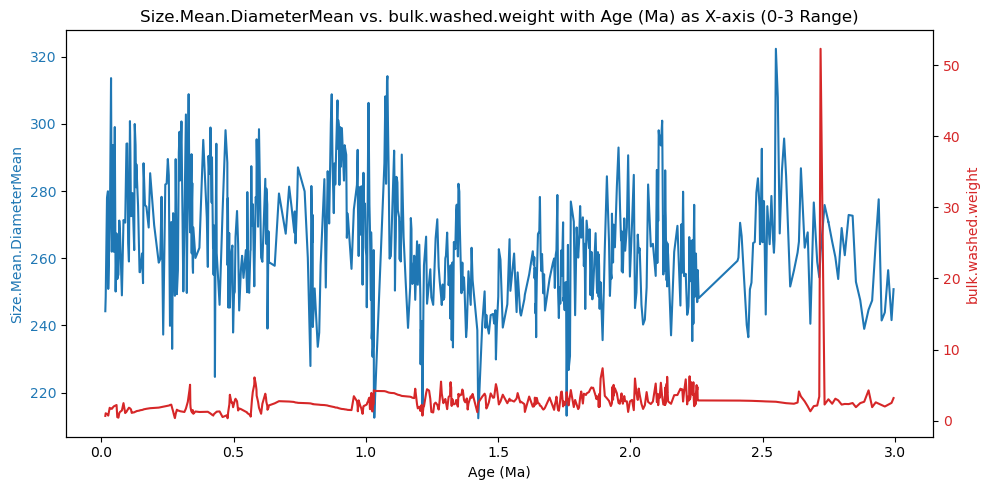

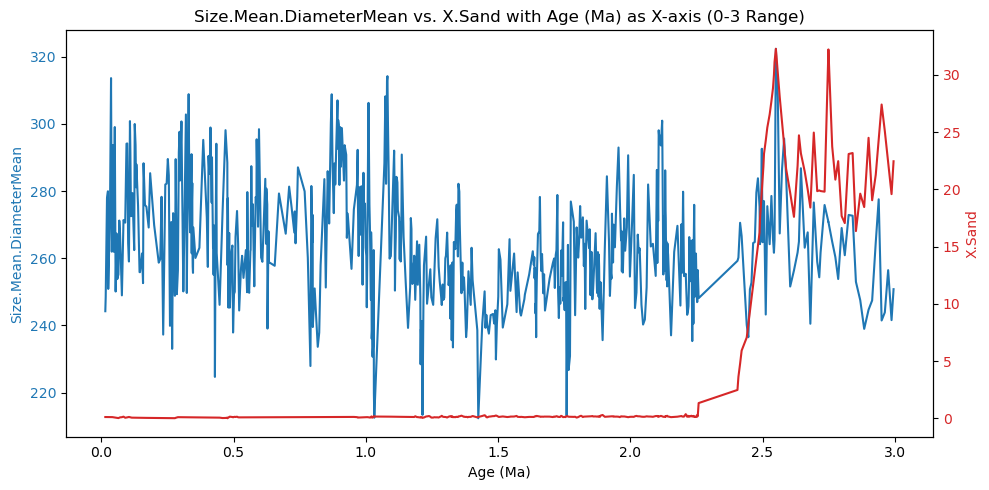

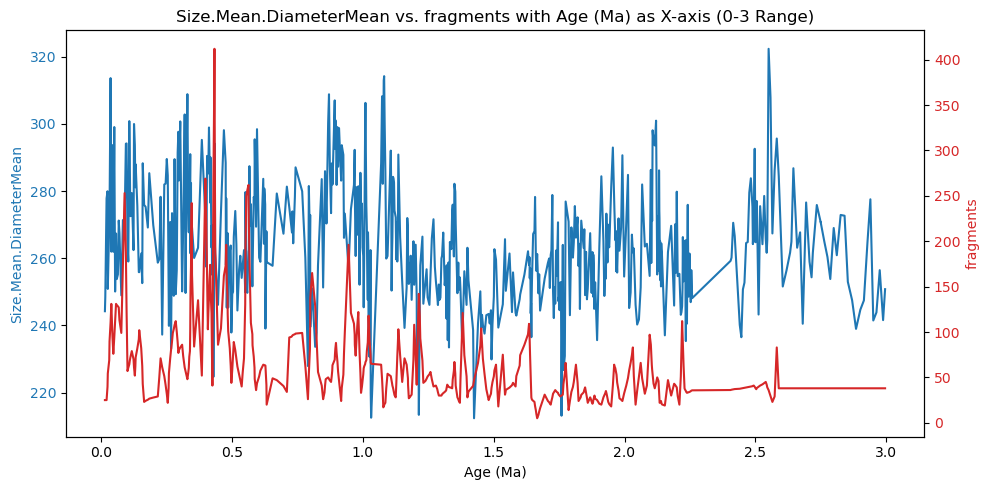

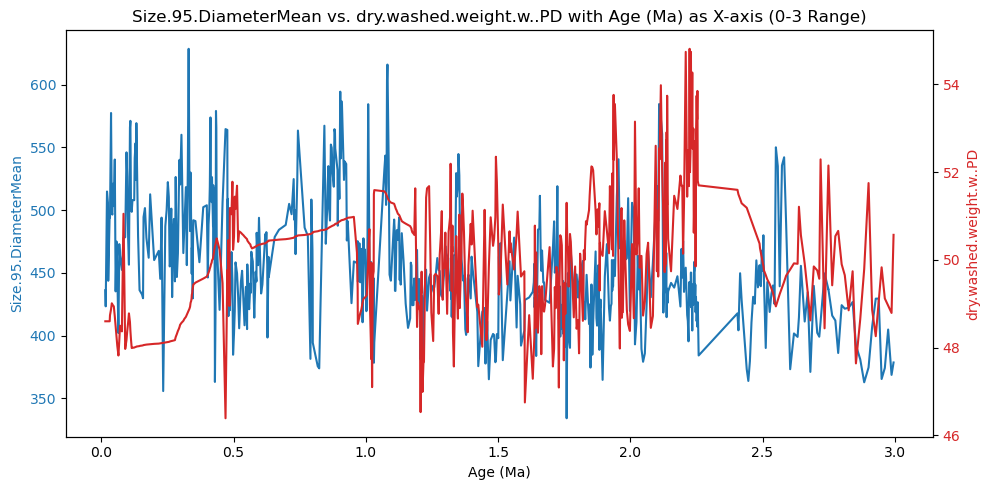

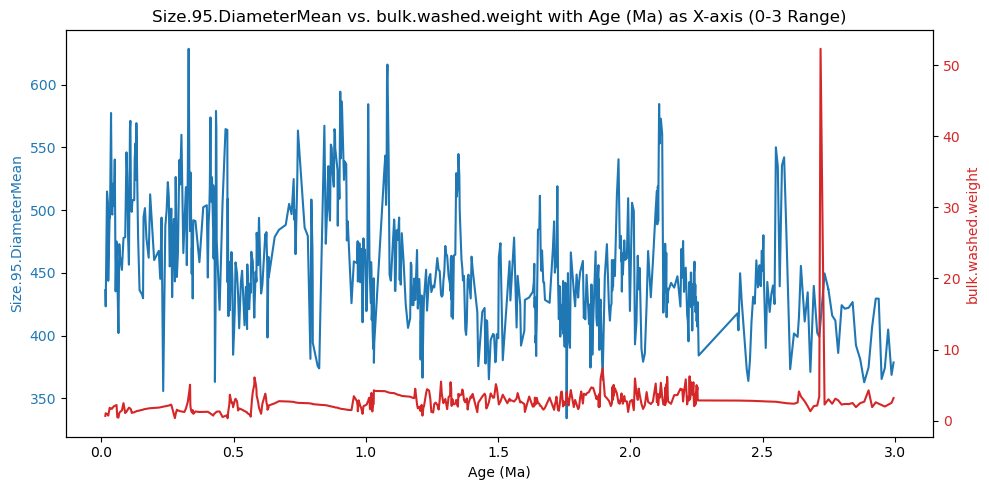

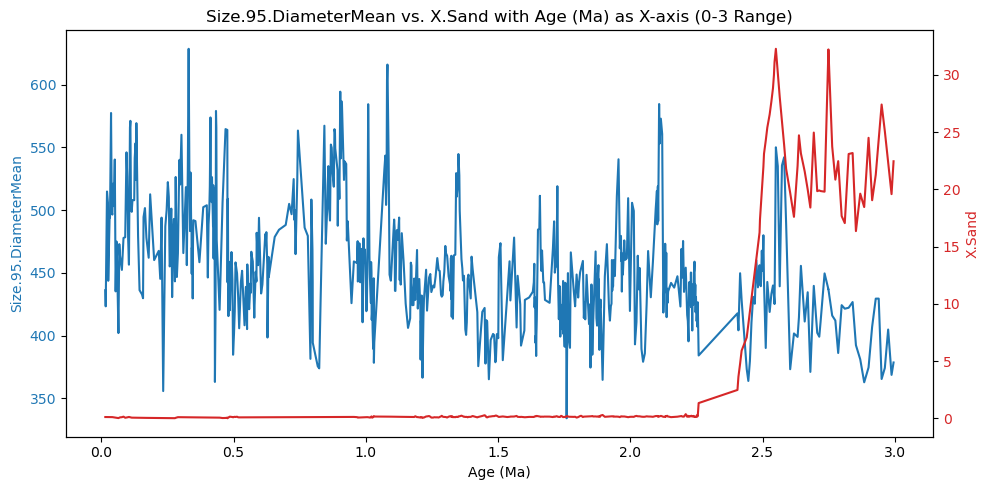

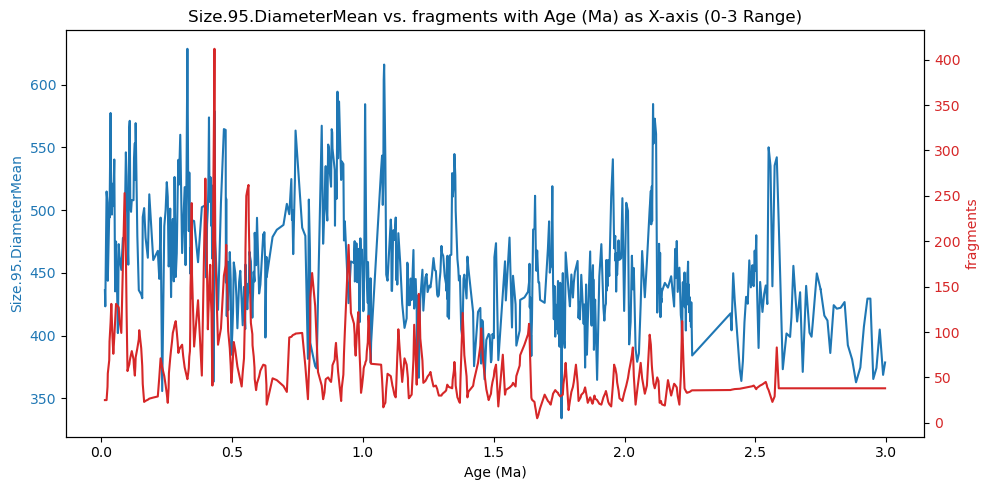

In [35]:
plot_data1("Size.Mean.DiameterMean", "dry.washed.weight.w..PD")
plot_data1("Size.Mean.DiameterMean", "bulk.washed.weight")
plot_data1("Size.Mean.DiameterMean", "X.Sand")
plot_data1("Size.Mean.DiameterMean", "fragments")
plot_data1("Size.95.DiameterMean", "dry.washed.weight.w..PD")
plot_data1("Size.95.DiameterMean", "bulk.washed.weight")
plot_data1("Size.95.DiameterMean", "X.Sand")
plot_data1("Size.95.DiameterMean", "fragments")

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def detect_outliers(series, threshold=3):
    """
    Mutation point detection: Calculate the first-order difference of the data and filter abnormal change points according to the threshold
    """
    diff = series.diff().fillna(0)  # Calculate the first-order difference
    mean, std = diff.mean(), diff.std()  # Calculate the mean and standard deviation
    return (np.abs(diff - mean) > threshold * std)  # Select points exceeding threshold * std

def plot_mutation_analysis(size_column, y_column):
   
    # Read and process data
    df_filtered = load_and_process_data(size_column, y_column)

    # Mutation point detection (increase the threshold to reduce false positives)
    size_outliers = detect_outliers(df_filtered[size_column], threshold=3)
    y_outliers = detect_outliers(df_filtered[y_column], threshold=3)

    # Create canvas 
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Left Y axis 
    ax1.set_xlabel(age_column)
    ax1.set_ylabel(size_column, color="tab:blue")
    ax1.plot(df_filtered[age_column], df_filtered[size_column], label=size_column, color="tab:blue")
    ax1.tick_params(axis='y', labelcolor="tab:blue")

    # Mark size_column mutation point (vertical line) 
    for idx in df_filtered.index[size_outliers]:
        ax1.axvline(df_filtered[age_column][idx], color="cyan", linestyle="--", alpha=0.6)

    # Right Y axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_column, color="tab:red")
    ax2.plot(df_filtered[age_column], df_filtered[y_column], label=y_column, color="tab:red")
    ax2.tick_params(axis='y', labelcolor="tab:red")

    # Mark y_column mutation point (vertical line)
    for idx in df_filtered.index[y_outliers]:
        ax2.axvline(df_filtered[age_column][idx], color="orange", linestyle="--", alpha=0.6)

    # Custom legend (vertical line indicating mutation point)
    legend_lines = [
        Line2D([0], [0], color='cyan', linestyle="--", label=f"{size_column} Mutation"),
        Line2D([0], [0], color='orange', linestyle="--", label=f"{y_column} Mutation")
    ]
    ax1.legend(handles=legend_lines, loc="upper right", frameon=False)

    plt.title(f"Mutation analysis ({size_column} vs. {y_column})")
    plt.show()




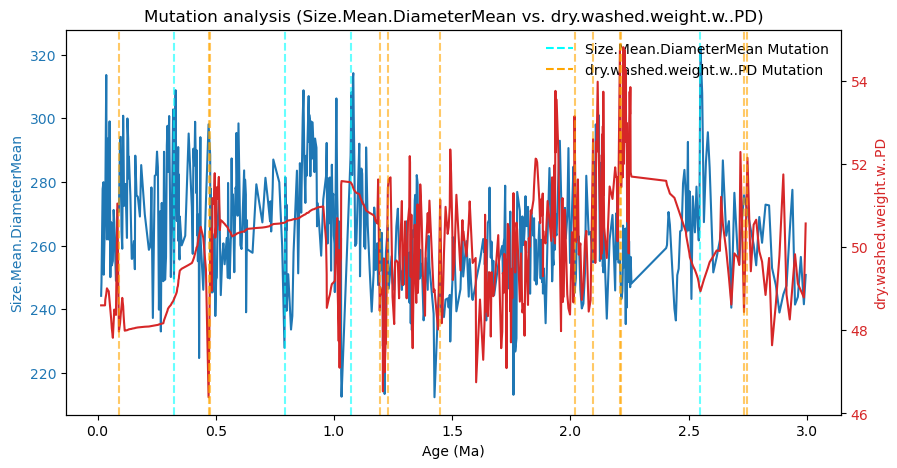

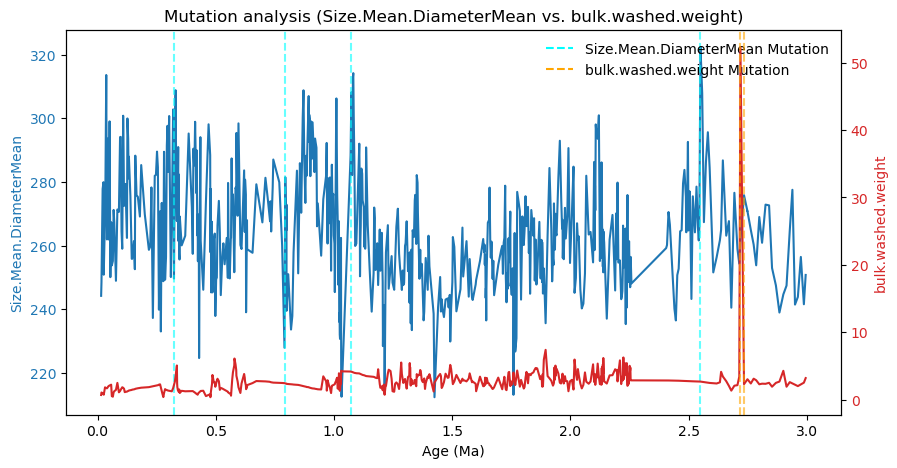

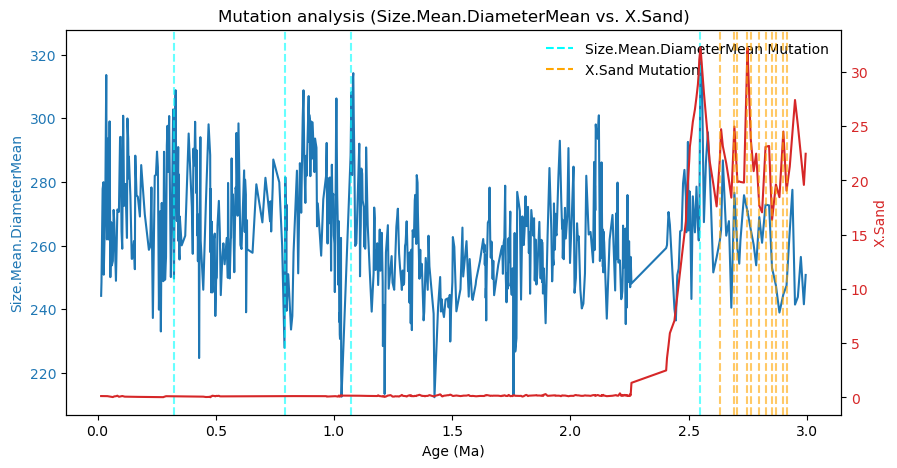

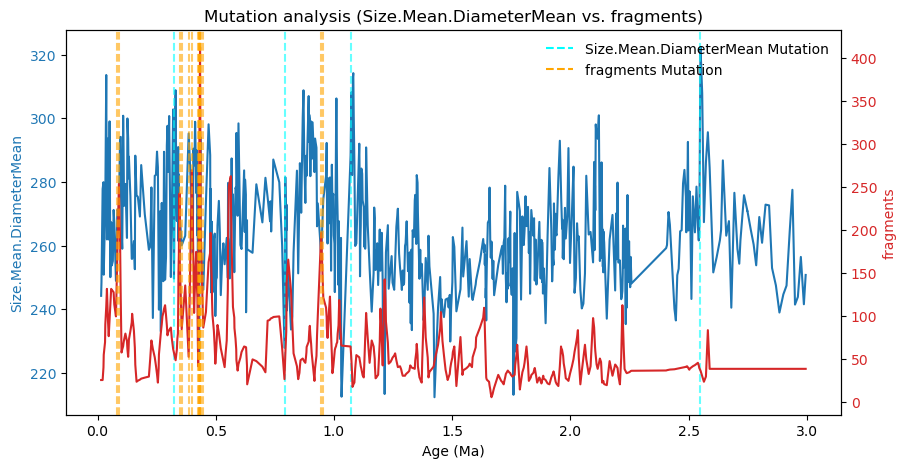

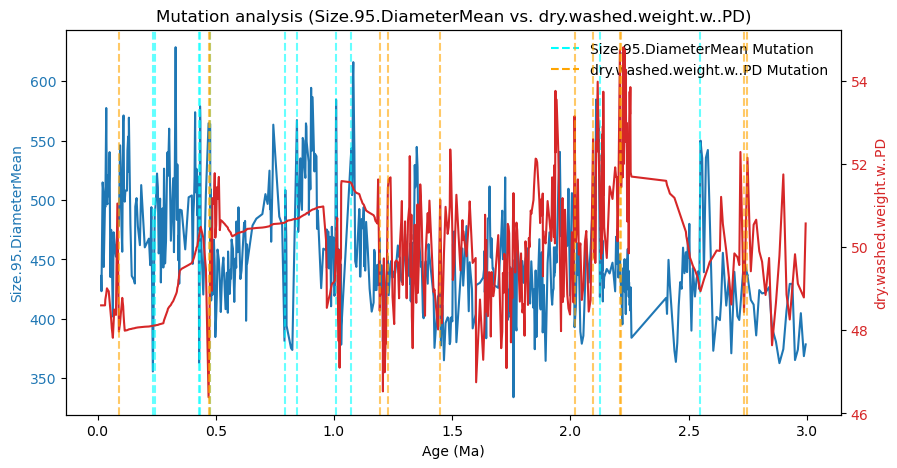

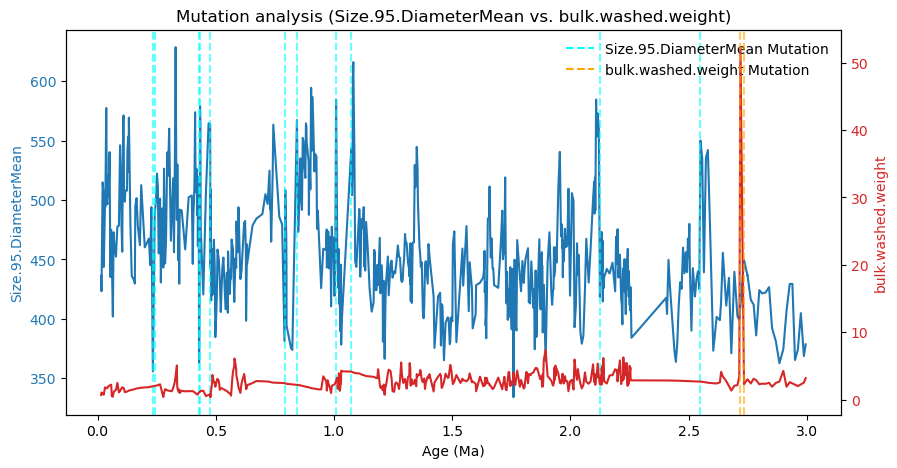

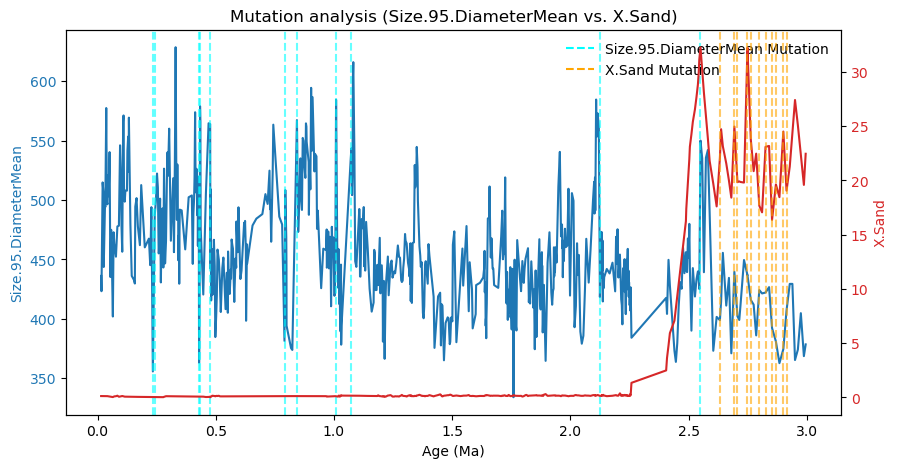

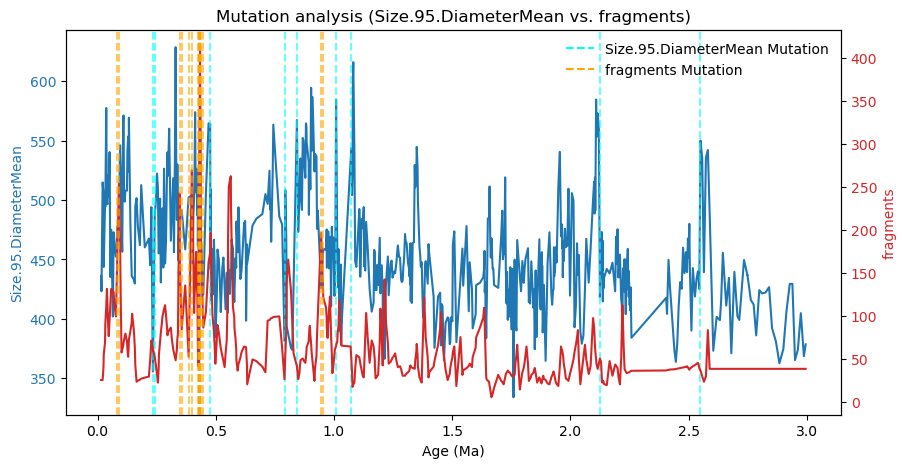

In [40]:
# Call function
plot_mutation_analysis("Size.Mean.DiameterMean", "dry.washed.weight.w..PD")
plot_mutation_analysis("Size.Mean.DiameterMean", "bulk.washed.weight")
plot_mutation_analysis("Size.Mean.DiameterMean", "X.Sand")
plot_mutation_analysis("Size.Mean.DiameterMean", "fragments")
plot_mutation_analysis("Size.95.DiameterMean", "dry.washed.weight.w..PD")
plot_mutation_analysis("Size.95.DiameterMean", "bulk.washed.weight")
plot_mutation_analysis("Size.95.DiameterMean", "X.Sand")
plot_mutation_analysis("Size.95.DiameterMean", "fragments")


In [47]:
def plot_regression_analysis(size_column, y_column):
    """
    Regression analysis:
    - Use quadratic polynomial to fit data and draw trend curves
    """
    df_filtered = load_and_process_data(size_column, y_column)

    # Create canvas
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Left Y axis
    ax1.set_xlabel(age_column)
    ax1.set_ylabel(size_column, color="tab:blue")
    ax1.plot(df_filtered[age_column], df_filtered[size_column], label=size_column, color="tab:blue")
    ax1.tick_params(axis='y', labelcolor="tab:blue")

    # Right Y axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(y_column, color="tab:red")
    ax2.plot(df_filtered[age_column], df_filtered[y_column], label=y_column, color="tab:red")
    ax2.tick_params(axis='y', labelcolor="tab:red")

    # Draw regression curve (Size) 
    size_poly = np.polyfit(df_filtered[age_column], df_filtered[size_column], deg=2)
    size_fit = np.poly1d(size_poly)
    ax1.plot(df_filtered[age_column], size_fit(df_filtered[age_column]), "--", color="navy", label="Size Regression")


    # Draw regression curve (C) 
    y_poly = np.polyfit(df_filtered[age_column], df_filtered[y_column], deg=2)
    y_fit = np.poly1d(y_poly)
    ax2.plot(df_filtered[age_column], y_fit(df_filtered[age_column]), "--", color="darkred", label=f"{y_column} Regression")

    # Add legend 
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.title(f"Regression ({size_column} vs. {y_column})")
    plt.show()


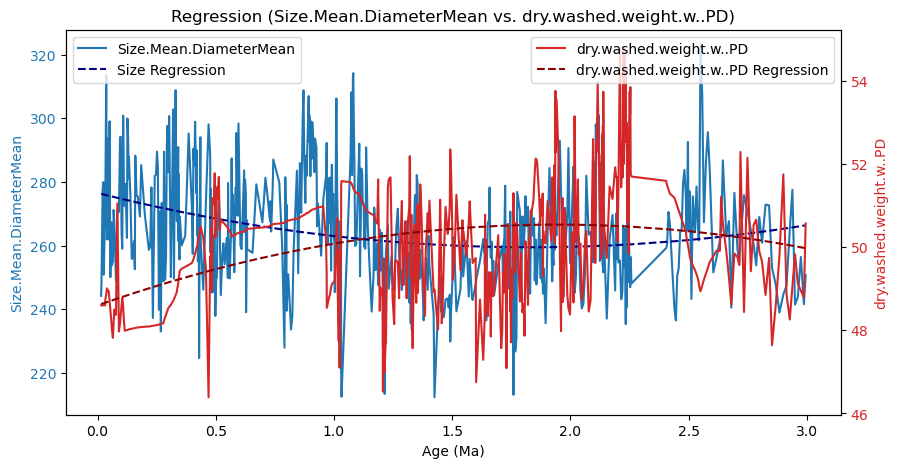

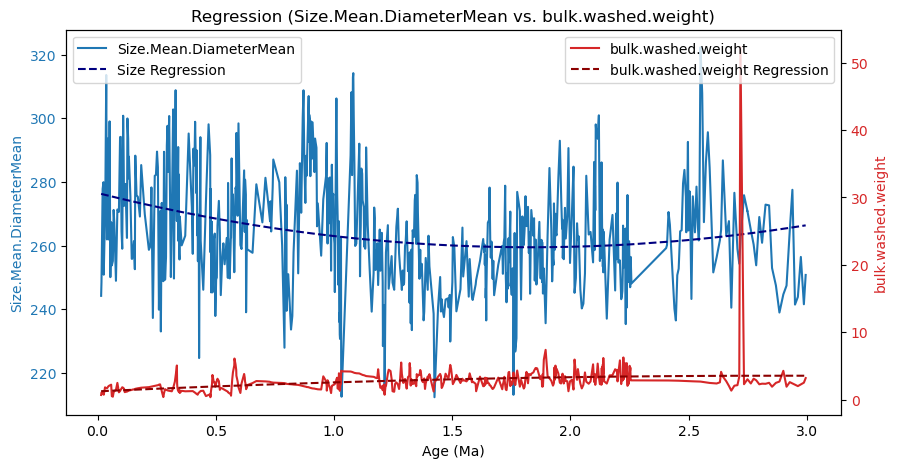

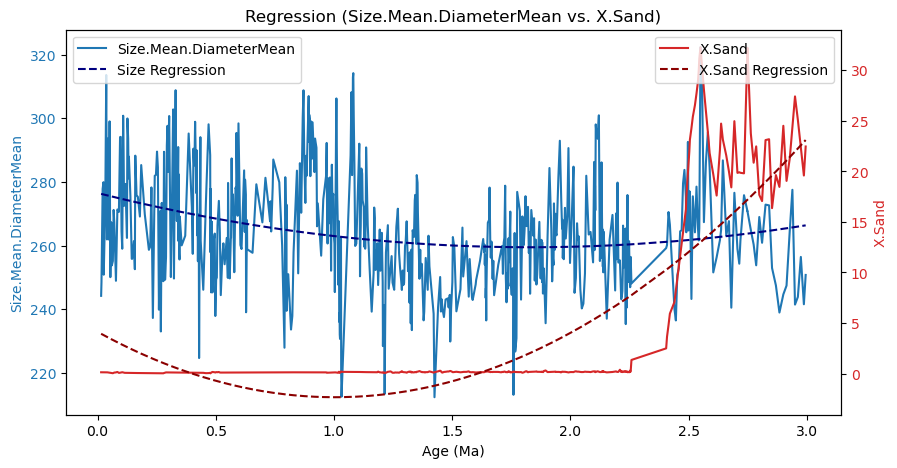

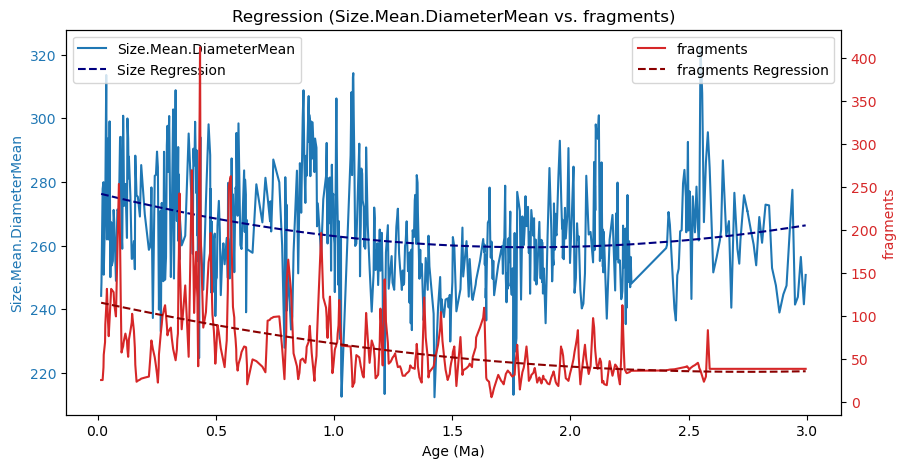

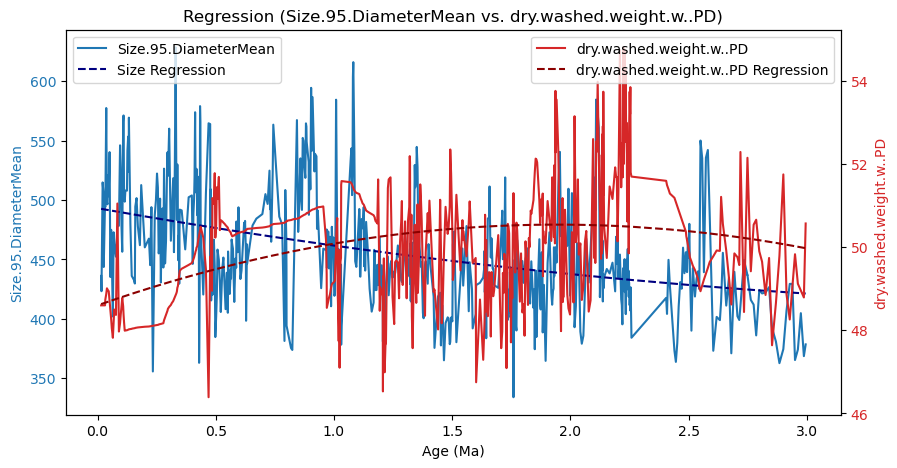

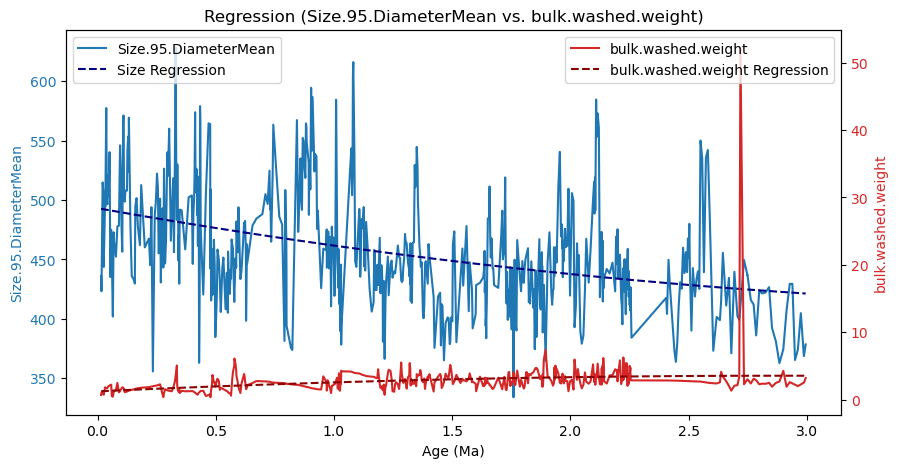

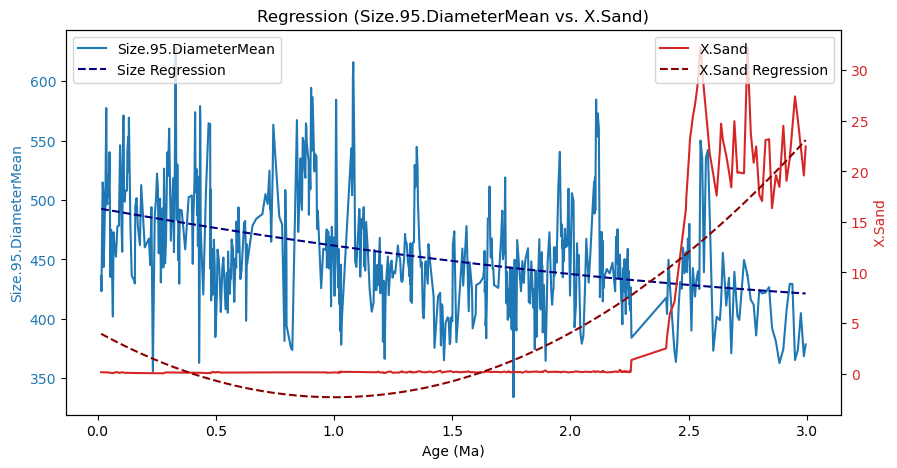

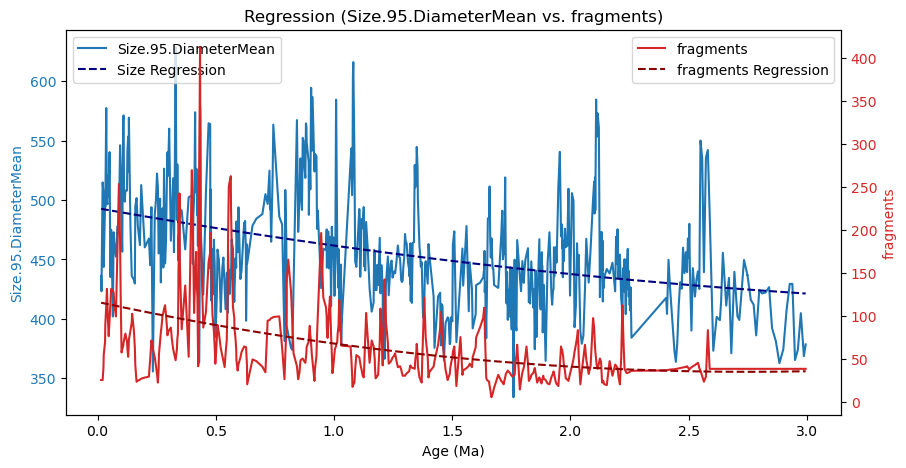

In [48]:
plot_regression_analysis("Size.Mean.DiameterMean", "dry.washed.weight.w..PD")
plot_regression_analysis("Size.Mean.DiameterMean", "bulk.washed.weight")
plot_regression_analysis("Size.Mean.DiameterMean", "X.Sand")
plot_regression_analysis("Size.Mean.DiameterMean", "fragments")
plot_regression_analysis("Size.95.DiameterMean", "dry.washed.weight.w..PD")
plot_regression_analysis("Size.95.DiameterMean", "bulk.washed.weight")
plot_regression_analysis("Size.95.DiameterMean", "X.Sand")
plot_regression_analysis("Size.95.DiameterMean", "fragments")


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


def analyze_correlation(size_column, y_column):

  
    # Read and process data
    df_filtered = load_and_process_data(size_column, y_column)

    # Calculate Pearson correlation coefficient (linear correlation)
    pearson_corr, pearson_p = pearsonr(df_filtered[size_column], df_filtered[y_column])

    # Calculate Spearman correlation coefficient (non-linear correlation)
    spearman_corr, spearman_p = spearmanr(df_filtered[size_column], df_filtered[y_column])

    # Print correlation analysis results
    print("{size_column} vs {y_column}")
    print("{pearson_corr:.3f}  (p={pearson_p:.5f})")
    print("{spearman_corr:.3f}  (p={spearman_p:.5f})")

    # Draw a scatter plot + linear fitting curve
    plt.figure(figsize=(8, 5))
    sns.regplot(x=df_filtered[size_column], y=df_filtered[y_column], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})

    plt.xlabel(size_column)
    plt.ylabel(y_column)
    plt.title(f"Correlation Analysis: {size_column} vs {y_column}\nPearson: {pearson_corr:.3f}, Spearman: {spearman_corr:.3f}")
    plt.grid(True)
    plt.show()

# Example call
# analyze_correlation("Grain Size", "Magnetization")


{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


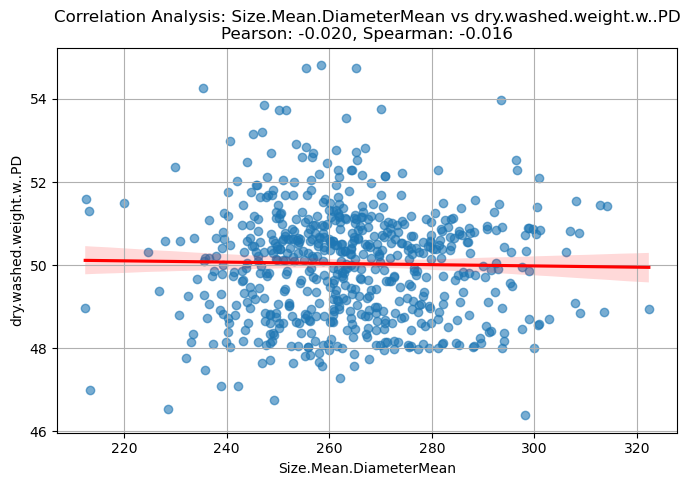

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


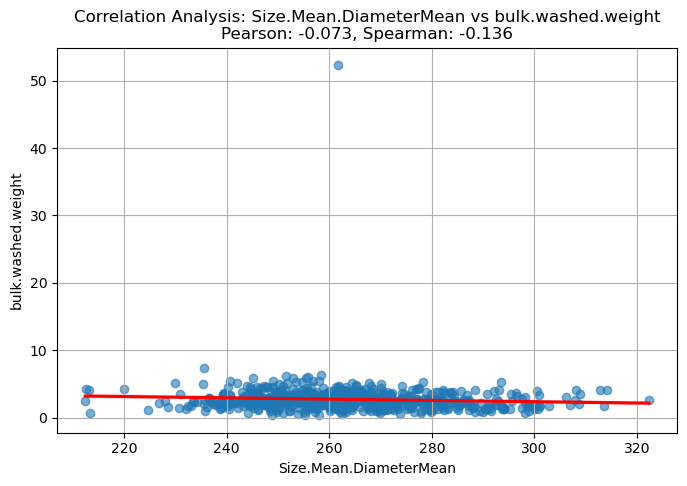

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


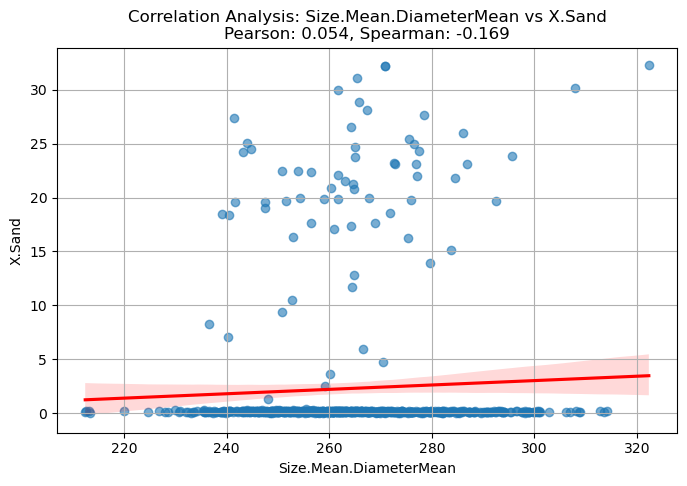

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


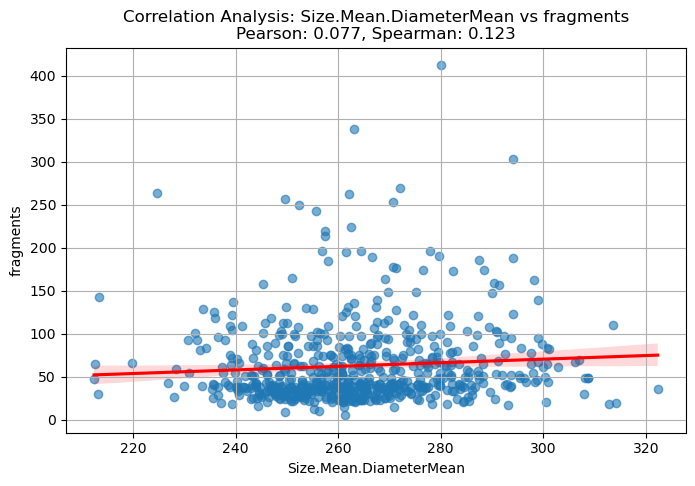

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


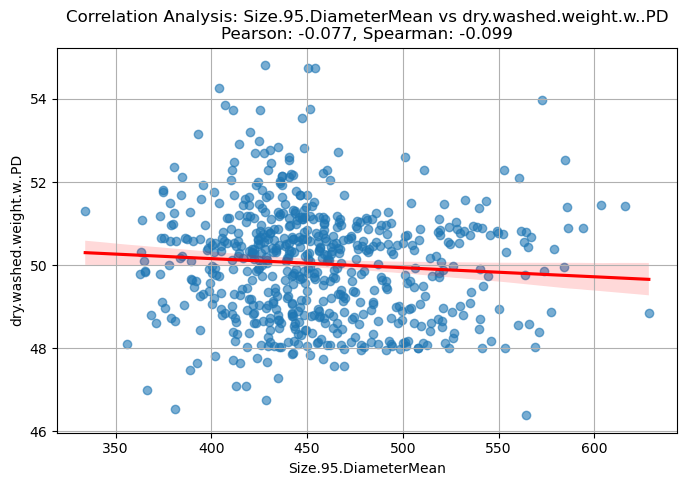

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


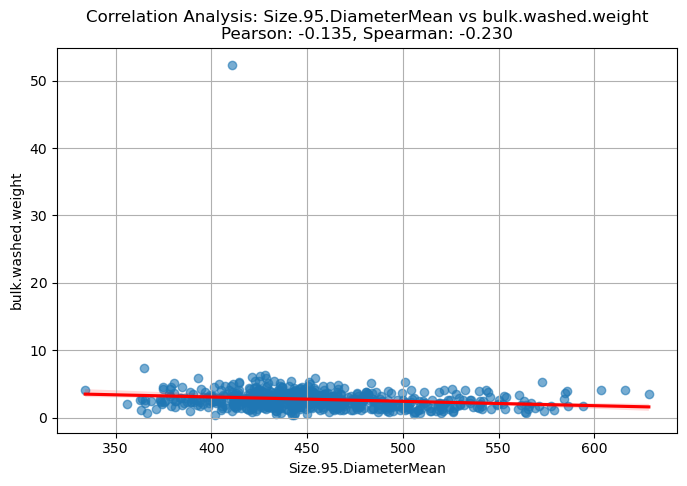

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


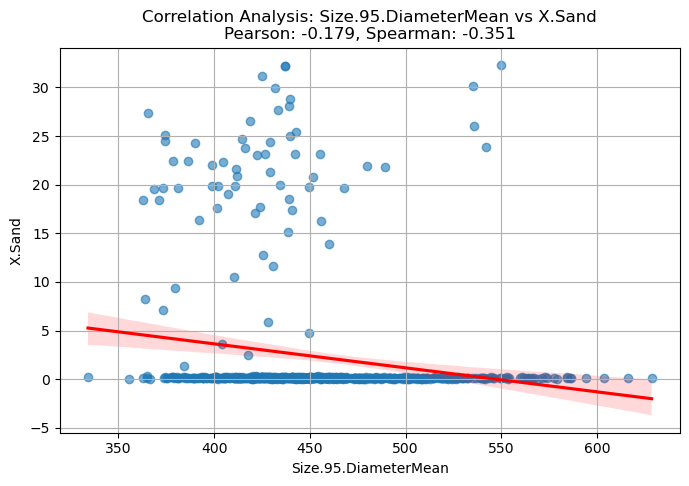

{size_column} vs {y_column}
{pearson_corr:.3f}  (p={pearson_p:.5f})
{spearman_corr:.3f}  (p={spearman_p:.5f})


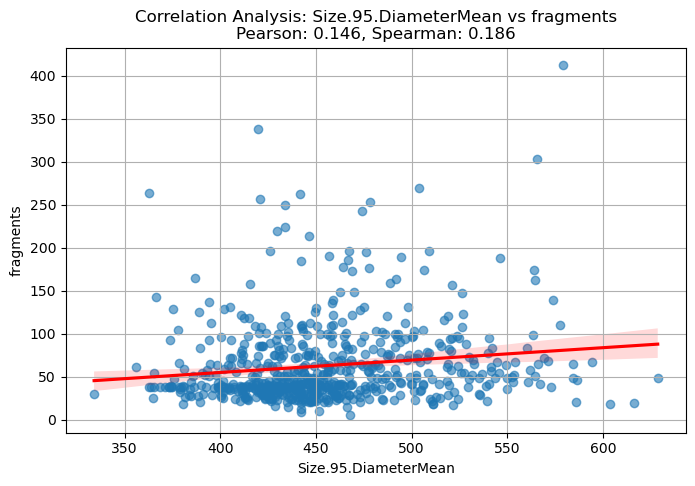

In [58]:
analyze_correlation("Size.Mean.DiameterMean", "dry.washed.weight.w..PD")
analyze_correlation("Size.Mean.DiameterMean", "bulk.washed.weight")
analyze_correlation("Size.Mean.DiameterMean", "X.Sand")
analyze_correlation("Size.Mean.DiameterMean", "fragments")
analyze_correlation("Size.95.DiameterMean", "dry.washed.weight.w..PD")
analyze_correlation("Size.95.DiameterMean", "bulk.washed.weight")
analyze_correlation("Size.95.DiameterMean", "X.Sand")
analyze_correlation("Size.95.DiameterMean", "fragments")

In [76]:
#box plot and violin plot for fragments & o18
import seaborn as sns

def plot_box_and_violin_normalized(size_column, fragment_column):
    df_filtered = load_and_process_data(size_column, fragment_column)
    # Extract data
    size_data = df_filtered[size_column]
    fragment_data = df_filtered[fragment_column]
    
    # Remove NaN values to ensure consistent data length
    valid_idx = ~np.isnan(size_data) & ~np.isnan(fragment_data)
    size_valid = size_data[valid_idx]
    fragment_valid = fragment_data[valid_idx]

    # Create a DataFrame to store valid data
    data_valid = pd.DataFrame({
        'Size': size_valid,
        'Fragments': fragment_valid
    })

    # Normalization [0, 1] range
    scaler = MinMaxScaler()
    data_normalized = pd.DataFrame(
        scaler.fit_transform(data_valid),
        columns=data_valid.columns
    )

    # Draw box plots and violin plots
    plt.figure(figsize=(12, 6))

    # Draw box plots of Size and Fragment
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_normalized, palette='Set2')
    plt.title(f"Normalized Boxplot ({size_column} & {fragment_column})")

    # Draw violin plots of Size and Fragment
    plt.subplot(1, 2, 2)
    sns.violinplot(data=data_normalized, palette='Set2')
    plt.title(f"Normalized Violin Plot ({size_column} & {fragment_column})")

    plt.tight_layout()
    plt.show()


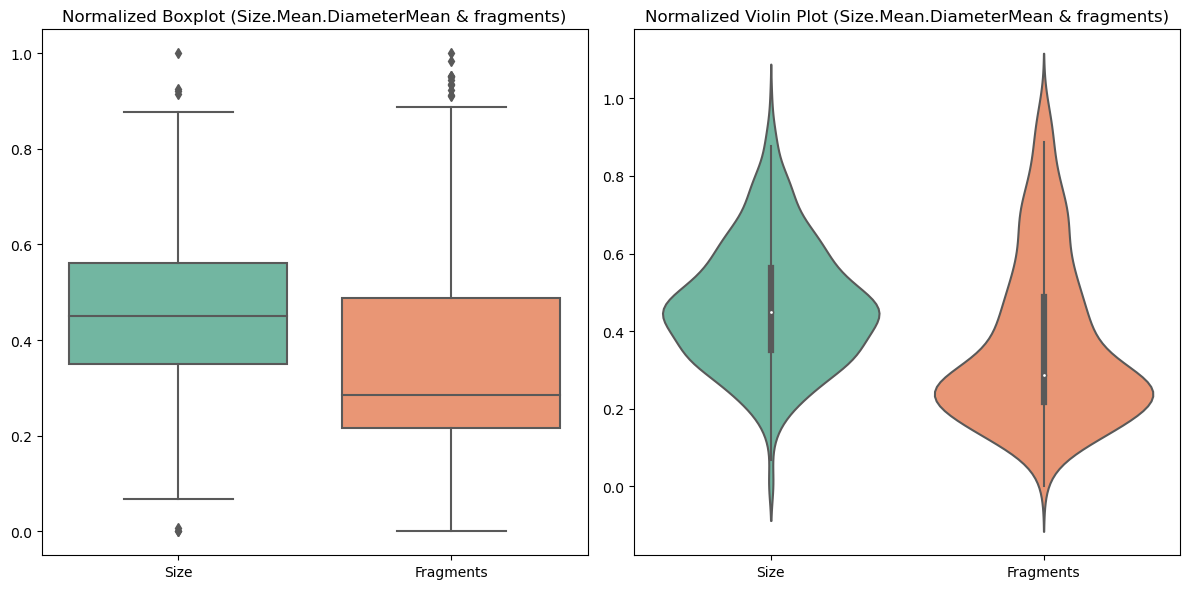

In [77]:
plot_box_and_violin_normalized("Size.Mean.DiameterMean", "fragments")
